Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC


EDA

In [42]:
df = pd.read_csv('heart_disease.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [43]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

PLotting


<AxesSubplot:xlabel='Smoker', ylabel='count'>

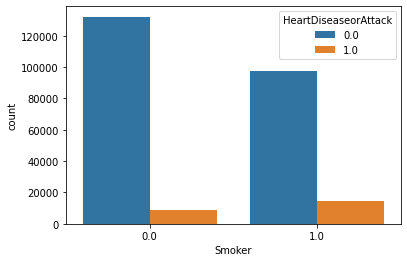

In [45]:
sns.countplot(x='Smoker',hue='HeartDiseaseorAttack',data=df)

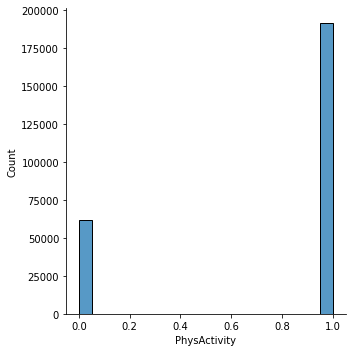

In [46]:
sns.displot(df['PhysActivity'],kde=False)

<AxesSubplot:xlabel='HighChol', ylabel='count'>

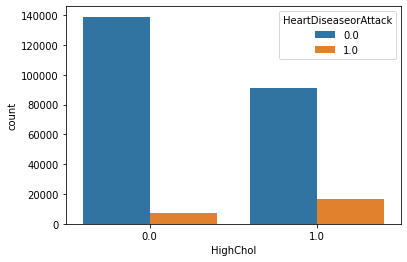

In [47]:
sns.countplot(x='HighChol',hue='HeartDiseaseorAttack',data=df)


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

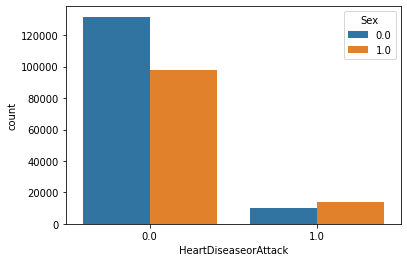

In [48]:
sns.countplot(x=df['HeartDiseaseorAttack'],hue=df['Sex'])

<AxesSubplot:>

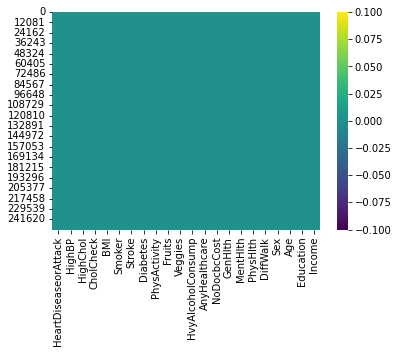

In [49]:
sns.heatmap(df.isnull(),data=df,cmap='viridis')


Feature Engineering


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [51]:
corr_matrix = df.corr()
corr_matrix['HeartDiseaseorAttack'].sort_values(ascending=False)

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

In [52]:
df[['Fruits','Veggies']]

,Fruits,Veggies
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
253675,1.0,1.0
253676,0.0,0.0
253677,1.0,0.0
253678,1.0,1.0


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

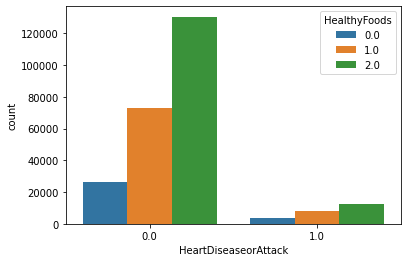

In [53]:
df['HealthyFoods'] = df['Fruits']+df['Veggies']

sns.countplot(x=df['HeartDiseaseorAttack'],hue=df['HealthyFoods'])

In [54]:
df['Education'].value_counts(ascending=True)

1.0       174
2.0      4043
3.0      9478
4.0     62750
5.0     69910
6.0    107325
Name: Education, dtype: int64

In [55]:
df['Diabetes'].value_counts(ascending=False)

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes, dtype: int64

In [56]:

z = list()
def conv(x):
    
    for i in x:
        if i == 0.0:
            z.append(0)

        elif i == 1.0:
            z.append(1)

        elif i == 2.0:
            z.append(1)
    return z

conv(df['Diabetes'])
df.drop(['Diabetes'],axis=1,inplace=True)
df['Diabetes'] = pd.DataFrame(z)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HealthyFoods,Diabetes
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,2.0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,2.0,0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,0.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1.0,0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,2.0,0


In [57]:
df['Diabetes'].value_counts()

0    213703
1     39977
Name: Diabetes, dtype: int64

In [58]:
df['Age'] = df['Age']*5
df['Age'].value_counts()

45.0    33244
50.0    32194
40.0    30832
35.0    26314
55.0    23533
30.0    19819
65.0    17363
25.0    16157
60.0    15980
20.0    13823
15.0    11123
10.0     7598
5.0      5700
Name: Age, dtype: int64

In [59]:
df = df.drop(['CholCheck','Sex','Fruits','BMI','NoDocbcCost','AnyHealthcare','HvyAlcoholConsump','Income','PhysActivity','Veggies','MentHlth','Education','PhysHlth'],axis=1)

In [60]:
df

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,GenHlth,DiffWalk,Age,HealthyFoods,Diabetes
0,0.0,1.0,1.0,1.0,0.0,5.0,1.0,45.0,1.0,0
1,0.0,0.0,0.0,1.0,0.0,3.0,0.0,35.0,0.0,0
2,0.0,1.0,1.0,0.0,0.0,5.0,1.0,45.0,1.0,0
3,0.0,1.0,0.0,0.0,0.0,2.0,0.0,55.0,2.0,0
4,0.0,1.0,1.0,0.0,0.0,2.0,0.0,55.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,3.0,0.0,25.0,2.0,0
253676,0.0,1.0,1.0,0.0,0.0,4.0,1.0,55.0,0.0,1
253677,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.0,0
253678,0.0,1.0,0.0,0.0,0.0,3.0,0.0,35.0,2.0,0


Train-Test Split


In [61]:
x = df.drop(['HeartDiseaseorAttack'],axis=1)
y = df['HeartDiseaseorAttack']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
x_train

,HighBP,HighChol,Smoker,Stroke,GenHlth,DiffWalk,Age,HealthyFoods,Diabetes
31141,0.0,1.0,1.0,0.0,2.0,0.0,60.0,2.0,0
98230,0.0,0.0,0.0,0.0,3.0,0.0,40.0,1.0,0
89662,1.0,1.0,0.0,0.0,2.0,0.0,60.0,2.0,1
208255,0.0,1.0,0.0,0.0,1.0,0.0,25.0,2.0,0
233415,0.0,1.0,0.0,0.0,3.0,1.0,60.0,2.0,0
...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,0
103694,1.0,1.0,1.0,0.0,3.0,0.0,55.0,1.0,0
131932,0.0,1.0,0.0,0.0,2.0,0.0,45.0,2.0,0
146867,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,0


Perfroming Scaling


In [64]:
std_sclr = StandardScaler()
x_train_num = std_sclr.fit_transform(x_train)
x_test_num = std_sclr.fit_transform(x_test)

Model Selection

In [65]:
LR = LogisticRegression()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
XGBC = XGBClassifier()
GNB = GaussianNB()
# SVC = SVC()

In [66]:
def model(x):
    x.fit(x_train_num,y_train)
    y_pred = x.predict(x_test_num)

    return print(classification_report(y_test,y_pred))

In [67]:
model(LR)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.55      0.12      0.19      4768

    accuracy                           0.91     50736
   macro avg       0.73      0.55      0.57     50736
weighted avg       0.88      0.91      0.88     50736



In [68]:
model(DC)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.48      0.09      0.16      4768

    accuracy                           0.91     50736
   macro avg       0.70      0.54      0.55     50736
weighted avg       0.87      0.91      0.88     50736



In [69]:
model(RF)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.48      0.11      0.17      4768

    accuracy                           0.91     50736
   macro avg       0.70      0.55      0.56     50736
weighted avg       0.87      0.91      0.88     50736



In [70]:
model(KNN)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     45968
         1.0       0.35      0.16      0.22      4768

    accuracy                           0.89     50736
   macro avg       0.63      0.57      0.58     50736
weighted avg       0.86      0.89      0.87     50736



In [71]:
model(XGBC)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.57      0.09      0.16      4768

    accuracy                           0.91     50736
   macro avg       0.74      0.54      0.56     50736
weighted avg       0.88      0.91      0.88     50736



In [72]:
model(GNB)

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     45968
         1.0       0.31      0.46      0.37      4768

    accuracy                           0.85     50736
   macro avg       0.63      0.68      0.65     50736
weighted avg       0.88      0.85      0.87     50736



In [73]:
# model(SVC)

Model Stacking



In [74]:
from sklearn.ensemble import StackingClassifier

In [75]:
estimators=[('KNN',KNN),('DC',DC),('RF',RF),('XGBC',XGBC),('GNB',GNB)]

In [76]:
stack_model = StackingClassifier(estimators=estimators,final_estimator=LR)
stack_model.fit(x_train_num,y_train)
y_pred=stack_model.predict(x_test_num)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.52      0.14      0.22      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.59     50736
weighted avg       0.88      0.91      0.88     50736



In [77]:
# estimators1=[('KNN',KNN),('DC',DC),('LR',LR),('XGBC',XGBC),('GNB',GNB)]

In [78]:
# stack_model = StackingClassifier(estimators=estimators1,final_estimator=RF)
# stack_model.fit(x_train_num,y_train)
# y_pred=stack_model.predict(x_test_num)

# print(classification_report(y_test,y_pred))

Exporting the final model


In [80]:
from joblib import dump,load

dump(stack_model,'Final.joblib')

['Final.joblib']

In [81]:
df

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,GenHlth,DiffWalk,Age,HealthyFoods,Diabetes
0,0.0,1.0,1.0,1.0,0.0,5.0,1.0,45.0,1.0,0
1,0.0,0.0,0.0,1.0,0.0,3.0,0.0,35.0,0.0,0
2,0.0,1.0,1.0,0.0,0.0,5.0,1.0,45.0,1.0,0
3,0.0,1.0,0.0,0.0,0.0,2.0,0.0,55.0,2.0,0
4,0.0,1.0,1.0,0.0,0.0,2.0,0.0,55.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,3.0,0.0,25.0,2.0,0
253676,0.0,1.0,1.0,0.0,0.0,4.0,1.0,55.0,0.0,1
253677,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.0,0
253678,0.0,1.0,0.0,0.0,0.0,3.0,0.0,35.0,2.0,0


Loading the Final Model to get predictions


In [83]:
model_final = load('Final.joblib')



array([0.])

In [92]:
x = model_final.predict([[1,1,0,0,4,1,55,0,1]])
for i  in x:
    if i == 0.0:
        print("Omaeva Mou Shideru")

    else:
        print("No Shinderu")

No Shinderu


In [94]:
import pickle

In [96]:
pickle.dump(stack_model,open('model.pkl','wb'))